In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/sea_image_data")

# here 80% of the data is splitted for training
train_df = tf.keras.preprocessing.image_dataset_from_directory(
            "/content/drive/MyDrive/sea_image_data",
            validation_split = 0.2,
            subset='training',
            seed=123
            )
# here 20% data is split for validation
validation_df = tf.keras.preprocessing.image_dataset_from_directory(
            "/content/drive/MyDrive/sea_image_data",
            validation_split=0.2,
            subset = "validation",
            seed=123
            )

Found 13761 files belonging to 23 classes.
Found 13761 files belonging to 23 classes.
Using 11009 files for training.
Found 13761 files belonging to 23 classes.
Using 2752 files for validation.


In [ ]:
import tensorflow_datasets as tfds

batch_size = 64

dataset_name =dataset
class_names = dataset.class_names

In [ ]:
print(class_names)

['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']


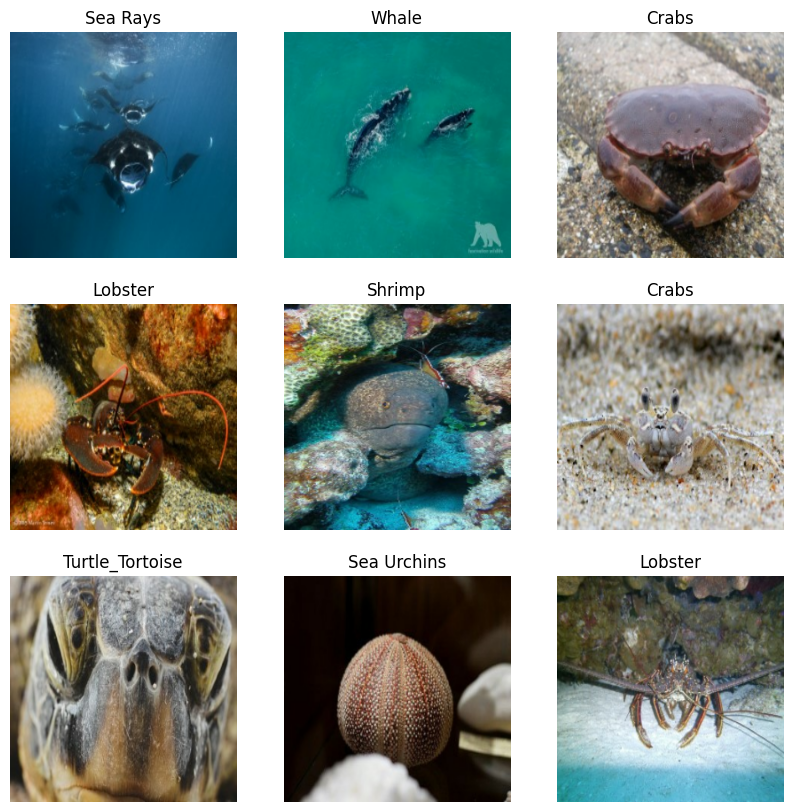

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Resize and Rescale the images of dataset

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_df = train_df.map(lambda x, y: (normalization_layer(x), y))
validation_df = validation_df.map(lambda x, y: (normalization_layer(x), y))

#Data Augmentation:

In [ ]:
data_augmentation = tf.keras.Sequential(
   [
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2),
     layers.RandomZoom(0.1)  ]  )

#Check the shape of the data:

In [ ]:
for image, label in train_df.take(1):
  print(image.shape)
  print(label.shape)
  break

(32, 180, 180, 3)
(32,)


#Creating Model:

In [ ]:
model = Sequential()

model.add(data_augmentation)
model.add(layers.Input(shape=(256, 256, 3)))

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(23, activation='softmax'))

#Model Compilation:

In [ ]:
model.compile(optimizer='adam',
              loss=,
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(train_df, validation_data=validation_df, epochs=30, verbose=1)